### Instructor Demo: Stock Portfolio Forecasting

This program executes `1000` simulations of stock price trajectory for `JNJ` and `MU` over the next `252` trading days (or year of trading), based on a normal probability distribution of potential daily returns derived from the corresponding sample means and standard deviations. Daily and cumulative portfolio returns are then calculated, using `60%` of capital allocated to `JNJ` and `40%` of capital allocated to `MU`, to analyze the probability distribution and confidence interval of potential ending cumulative portfolio returns.

In [2]:
# Import libraries and dependencies


In [3]:
# Load .env enviroment variables


# Set Alpaca API key and secret


### Check Available Tickers from Alpaca Markets API

In [4]:
# Get all Asstes


# Keep only tradeable assets


[Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'ARCA',
     'id': '02b6820c-e5d5-462f-b3d0-d600919dffd7',
     'marginable': True,
     'name': 'Direxion Daily Gold Miners Bull 3X Shares of Direxion Shares ETF '
             'Trust',
     'shortable': False,
     'status': 'active',
     'symbol': 'NUGT',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': 'd174dc71-0a75-47a7-a43c-5cf9360111bf',
     'marginable': True,
     'name': 'ETF Series Solutions Trust Loncar Cancer Immunotherapy ETF',
     'shortable': False,
     'status': 'active',
     'symbol': 'CNCR',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': '07844fc5-d49c-41dd-a543-dccaf6aec65c',
     'marginable': True,
     'name': 'Co-Diagnostics, Inc. Common Stock',
     'shortable': False,
     'status': 'active',
     'symbol': 'CODX',
     't

In [5]:
# Create a new empty DataFrame


# Display the first 10 asset tickers


,symbol
0,NUGT
1,CNCR
2,CODX
3,TDOC
4,ONEM
5,CRAI
6,SPWH
7,SDPI
8,KREF
9,NFBK


### Get 1 Year's Worth of Data via API Call and Read in as DataFrame 

In [6]:
# Set the list of tickers


# Set timeframe to '1D'


# Set start and end datetimes of 1 year, between now and 365 days ago.


# Get 1 year's worth of historical data for AAPL



JNJ                                      MU  \
                             open    high     low   close   volume   open   
2019-11-04 00:00:00-05:00  131.80  131.95  130.09  130.25  4783710  49.39   
2019-11-05 00:00:00-05:00  130.53  131.47  129.68  130.42  4650959  49.62   
2019-11-06 00:00:00-05:00  130.42  131.48  129.70  130.96  3349382  48.15   
2019-11-07 00:00:00-05:00  131.73  132.38  131.01  131.56  4757646  48.52   
2019-11-08 00:00:00-05:00  131.30  133.04  130.97  132.97  4047354  47.56   

                                                            
                             high     low  close    volume  
2019-11-04 00:00:00-05:00  49.900  49.250  49.60  14911674  
2019-11-05 00:00:00-05:00  49.720  48.605  48.68  13015997  
2019-11-06 00:00:00-05:00  48.300  47.105  47.68  20119517  
2019-11-07 00:00:00-05:00  49.080  48.000  48.43  18385442  
2019-11-08 00:00:00-05:00  48.005  46.950  47.18  17334308

### Drop Extraneous Columns

In [7]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame




,JNJ,MU
,close,close
2019-11-04 00:00:00-05:00,130.25,49.60
2019-11-05 00:00:00-05:00,130.42,48.68
2019-11-06 00:00:00-05:00,130.96,47.68
2019-11-07 00:00:00-05:00,131.56,48.43
2019-11-08 00:00:00-05:00,132.97,47.18


### Calculate Daily Returns

In [8]:
# Use the `pct_change` function to calculate daily returns of `JNJ` and `MU`.




,JNJ,MU
,close,close
2019-11-04 00:00:00-05:00,NaN,NaN
2019-11-05 00:00:00-05:00,0.001305,-0.018548
2019-11-06 00:00:00-05:00,0.004140,-0.020542
2019-11-07 00:00:00-05:00,0.004582,0.015730
2019-11-08 00:00:00-05:00,0.010718,-0.025810


### Calculate Value of Average Daily Returns

In [9]:
# Use the `mean` function to calculate the mean of daily returns for `JNJ` and `MU`, respectively




-0.00035364215612684066

### Calculate Value of Standard Deviation of Daily Returns

In [10]:
# Use the `std` function to calculate the standard deviation of daily returns for `JNJ` and `MU`, respectively




0.04351582478774182

### Run the Monte Carlo Simulation and Save Results to DataFrame

In [11]:
# Set number of simulations and trading days


# Set last closing prices of `JNJ` and `MU`


# Initialize empty DataFrame to hold simulated prices for each simulation


# Run the simulation of projecting stock prices for the next trading year, `1000` times


    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`

    
    # Simulate the returns for 252 days

        
        # Calculate the simulated price using the last price within the list
      
    
    
        # Append the simulated price to the list

        
    
    # Append a simulated prices of each simulation to DataFrame

    
    
    # Calculate the daily returns of simulated prices

    
    # Set the portfolio weights (60% JNJ; 40% MU)
    

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    
    
    # Calculate the normalized, cumulative return series
    

# Print records from the DataFrame


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009882,1.043536,1.056012,0.981857,0.994292,0.971637,0.985094,0.989322,1.025838,1.006396,...,1.015264,1.046829,0.970364,0.990014,1.013305,1.000185,1.003477,0.982758,0.970230,1.002778
2,1.026068,1.054282,1.082205,0.941480,1.037816,0.945881,0.958365,0.984899,1.032363,1.034458,...,0.989938,1.100410,0.981168,0.959085,1.034858,1.006470,0.973644,0.984790,0.934843,1.037335
3,1.029965,1.036934,1.075704,0.975511,1.006395,0.941484,0.954141,1.015146,0.992738,1.022293,...,1.024984,1.070427,0.985238,0.963328,1.069777,1.018495,0.955970,0.956059,0.955885,1.038173
4,1.024452,1.095017,1.046858,0.984347,1.053828,0.919008,0.951300,1.012834,0.997125,1.013541,...,1.039134,1.077572,1.026774,0.997283,1.095500,1.028950,0.945113,0.975450,0.951378,1.029280


### Plot the Multiple Simulations of Potential Cumulative Portfolio Returns over the Next Year (252 Trading Days)

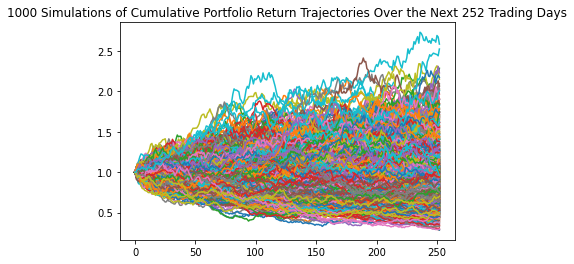

In [12]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days



In [13]:
# Select the last row for project stock prices (prices of each simulation on the 252nd trading day)



0    1.546987
1    0.722636
2    0.683058
3    0.564843
4    0.940448
Name: 252, dtype: float64

### Plot the Frequency Distribution of Simulated Ending Portfolio Cumulative Returns on the 252nd Trading Day

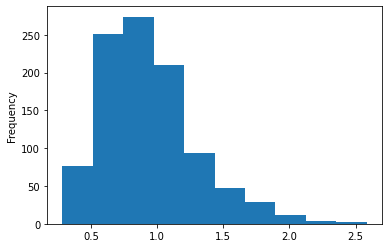

In [14]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices


### Calculate the Probability Distribution of Ending Cumulative Return Ranges

(0.745, 0.975]    0.274
(0.515, 0.745]    0.251
(0.975, 1.205]    0.210
(1.205, 1.435]    0.094
(0.282, 0.515]    0.076
(1.435, 1.665]    0.048
(1.665, 1.895]    0.029
(1.895, 2.125]    0.012
(2.125, 2.355]    0.004
(2.355, 2.585]    0.002
Name: 252, dtype: float64

### Calculate Lower and Upper Bounds of 95% Confidence Interval for Simulated Ending Cumulative Portfolio Returns

In [16]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices



0.025    0.439004
0.975    1.796809
Name: 252, dtype: float64

### Plot the Probability Distribution and 95% Confidence Interval of Simulated Ending Cumulative Portfolio Returns 

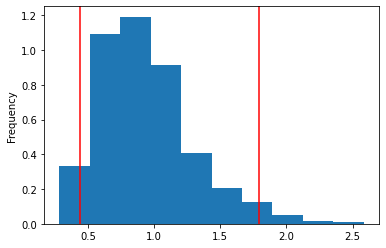

In [17]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval



### Calculate 95% Confidence Interval of An Initial Investment of 10,000 in the Portfolio over the Next 252 Trading Days

In [18]:
# Set initial investment


# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns

                                                    
# Print the results



There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 252 trading days will end within in the range of $14390.041027176962 and $27968.094237922312
